# Data Visualization & Tidying Lab

This notebook is split into **two parts**:

1. **Core skills tutorial** – short walkthroughs that demonstrate standard Python data-visualization techniques with `matplotlib`, `seaborn`, and `pandas`.  
2. **Applied challenges** – five messy, simulated data sets accompanied by stakeholder-style questions that someone might ask you to answer. Your task is to tidy each data set and write a brief data story for your audience with visuals.



## Part 1 – Core Visualization Skills 

### 1. Line, scatter, bar – the classics

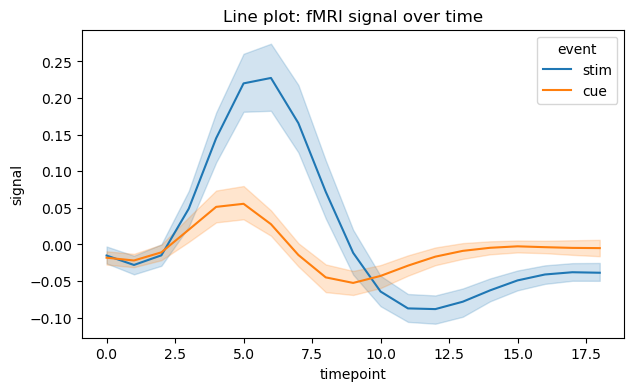

In [1]:
import seaborn as sns, matplotlib.pyplot as plt, pandas as pd

# Load example
fmri = sns.load_dataset('fmri')

# LINE PLOT — average signal over time for each event type
plt.figure(figsize=(7,4))
sns.lineplot(data=fmri, x='timepoint', y='signal', hue='event') 
plt.title('Line plot: fMRI signal over time')
plt.show()



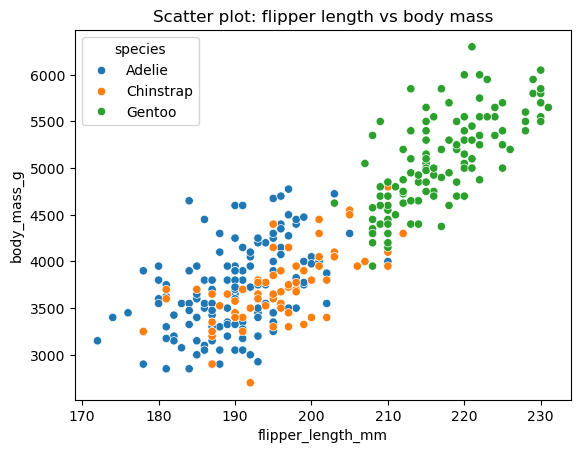

In [2]:
# SCATTER PLOT — flipper vs body mass
penguins = sns.load_dataset('penguins').dropna()
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.title('Scatter plot: flipper length vs body mass')
plt.show()



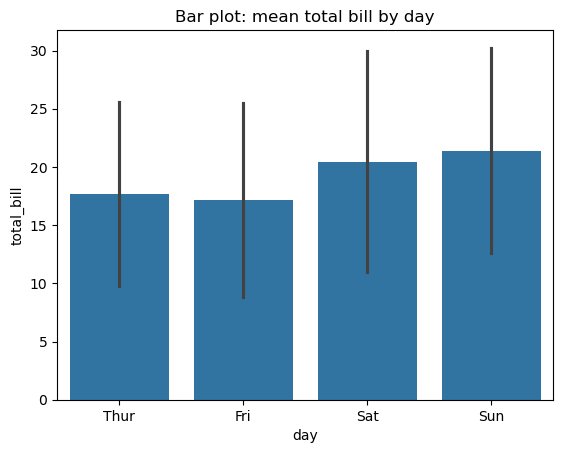

In [3]:
# BAR PLOT — mean total bill by day
tips = sns.load_dataset('tips')
sns.barplot(data=tips, x='day', y='total_bill', errorbar='sd')
plt.title('Bar plot: mean total bill by day')
plt.show()

These three basic plotting examples cover **quantitative over time**, **relationship between two numeric variables**, and **comparisons across categories**. Remember to always label axes and provide context in titles or captions.

### 2. Distributions – histograms, KDEs, box/violin

Use **histograms/KDEs** for a single distribution and **box/violin** plots for comparing distributions across groups.

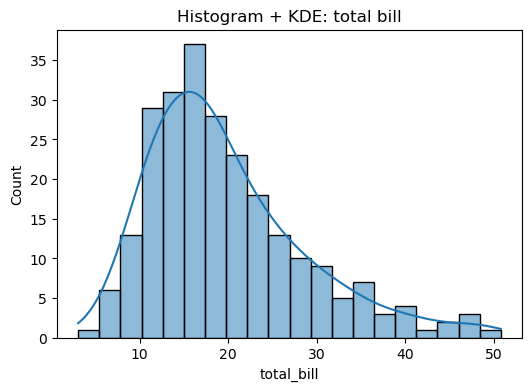

In [4]:
# Histogram + KDE overlay for 'total_bill'
plt.figure(figsize=(6,4))
sns.histplot(tips['total_bill'], kde=True, bins=20)
plt.title('Histogram + KDE: total bill')
plt.show()


#### What is a KDE and why would you ever want one? 

A KDE is a curve that represents the density of a distribution. It takes a discreet histogram distribution and makes an estimate of a continuous distribution. This can be helpful to estimate probabilities and also to see a clearer shape of the distribution.

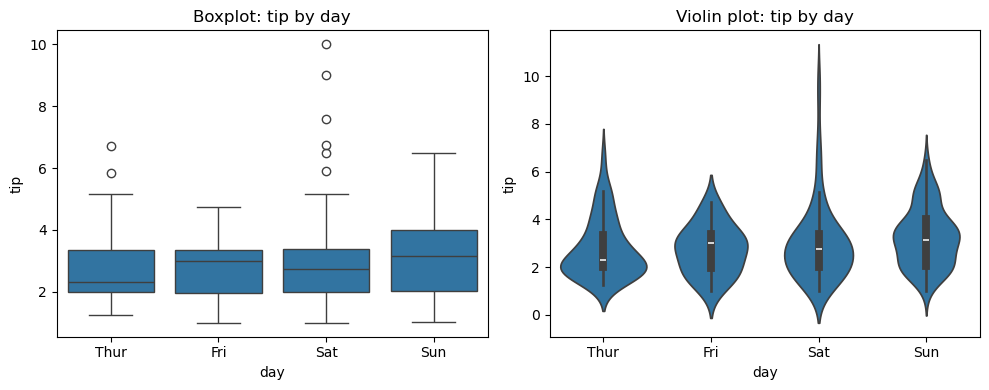

In [5]:
# Box & violin plots side-by-side
fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.boxplot(data=tips, x='day', y='tip', ax=ax[0])
ax[0].set_title('Boxplot: tip by day')
sns.violinplot(data=tips, x='day', y='tip', ax=ax[1])
ax[1].set_title('Violin plot: tip by day')
plt.tight_layout()
plt.show()

#### Why would you want to use a boxplot over a violin plot and vice versa?

A boxplot is helpful because it shows outliers, while a violin plot is more helpful for visualizing the shape of a distribution.

### 3. Multi-dimensional encodings – color, size & facets

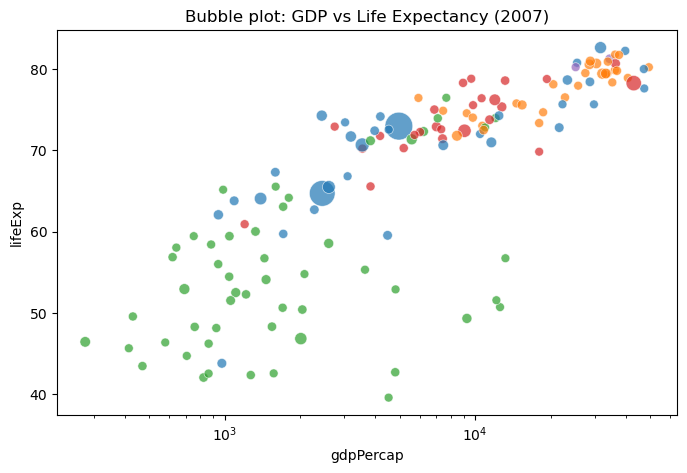

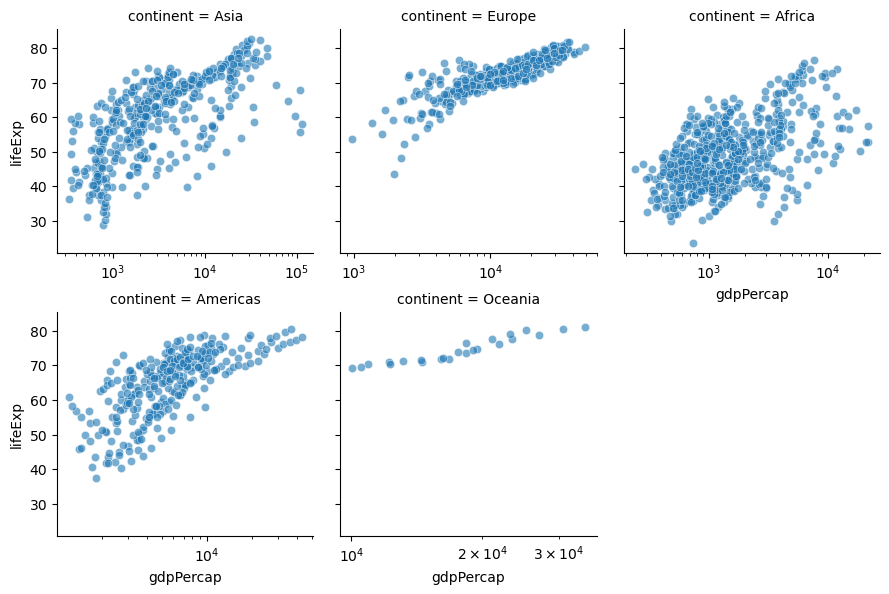

In [6]:
# Bubble plot: GDP vs life expectancy, bubble size = population
gap_url = 'https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv'
gap = pd.read_csv(gap_url)
year2007 = gap[gap.year == 2007]

plt.figure(figsize=(8,5))
sns.scatterplot(data=year2007, x='gdpPercap', y='lifeExp',
                size='pop', hue='continent', sizes=(40,400), alpha=0.7, legend=False)
plt.xscale('log')
plt.title('Bubble plot: GDP vs Life Expectancy (2007)')
plt.show()

# Facet grid
g = sns.relplot(data=gap, x='gdpPercap', y='lifeExp',
                col='continent', col_wrap=3,
                kind='scatter', height=3, alpha=0.6, facet_kws={'sharex':False})
g.set(xscale='log')

color, point size, and faceting let you incorporate **additional variables** without clutter.

### 4. Time series & multiple lines

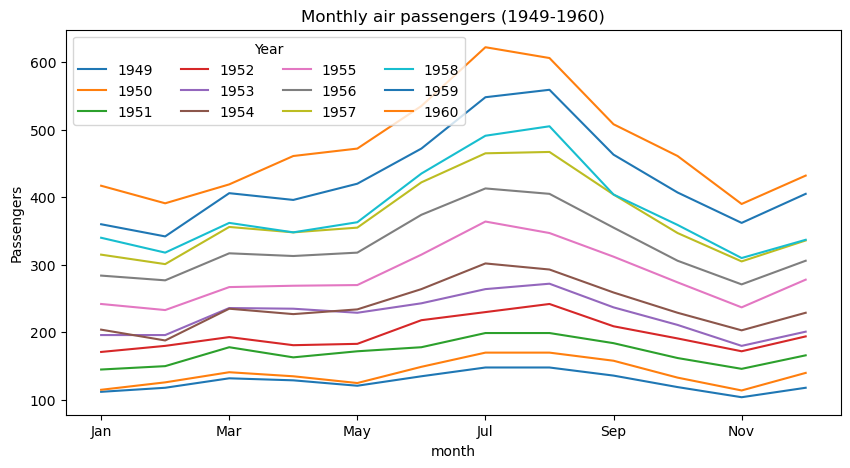

In [7]:
# Flights example
flights = sns.load_dataset('flights')
pivot = flights.pivot(index='month', columns='year', values='passengers')

pivot.plot(figsize=(10,5))
plt.title('Monthly air passengers (1949-1960)')
plt.ylabel('Passengers')
plt.legend(loc='upper left', ncol=4, title='Year')
plt.show()

Pivoting long-format data wide can make multi-line time-series plots straightforward.

### 5. Customising aesthetics

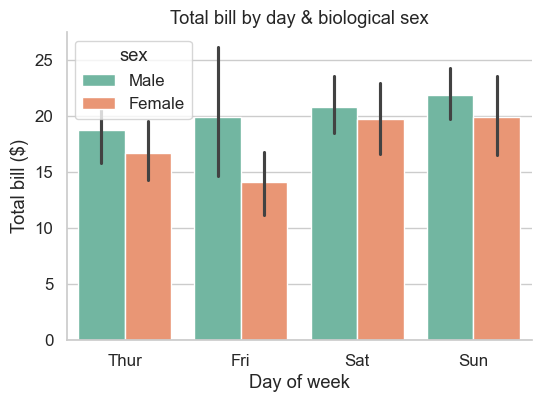

In [8]:
# Global Seaborn style
sns.set_theme(style='whitegrid', context='notebook', font_scale=1.1)

plt.figure(figsize=(6,4))
sns.barplot(data=tips, x='day', y='total_bill', hue='sex', palette='Set2')
plt.title('Total bill by day & biological sex')
plt.xlabel('Day of week')
plt.ylabel('Total bill ($)')
sns.despine()
plt.show()

Small touches (despine, style, context, custom palettes) go a long way to professional-looking figures.

## Part 2 – Applied Challenges

Below are five *realistic* messy data sets.  
For **each**:

1. **Run** the *Generate the data* cell to create a DataFrame `df`.  
2. Inspect & **tidy** it into a clean, analysis-ready form (remember *Tidy ≡ one variable per column, one observation per row*).  
3. **Answer the questions** in a concise written report (use the provided headings).  
4. Support your conclusions with **at least two visualizations** (feel free to create more).

### Report template (copy for each dataset)
- **Context** – restate the stakeholder’s objective in 1-2 sentences.  
- **Tidying steps** – bullet list of wrangling operations applied.  
- **Findings** – describe what the visuals show.  
- **Recommendations** – actionable insights for the stakeholder.


### Challenge 1: Global Gadget Co. sales data (messy wide)

*Stakeholder*: **VP of Sales**  
> “We need to understand how each product sold across regions over the year and spot any patterns.”

**Key questions**
1. Which region and month generated the highest revenue for *Gizmo*?
2. Do *Widget* and *Doohickey* follow similar patterns over the year?

### Challenge 2: IoT greenhouse sensor logs

*Stakeholder*: **Facility engineer**  
> “Our sensors embed temperature and humidity in one field. I suspect humidity spikes at night – can you confirm?”

**Key questions**
1. At what hours does humidity exceed 60 % most frequently?
2. Is there any correlation between temperature and humidity?

### Challenge 3: Developer tools preference survey

*Stakeholder*: **Product manager**  
> “We surveyed devs about their favorite tools. Can you tell if age group influences tool choice and satisfaction?”

**Key questions**
1. Which tools are most popular in the 18-24 vs 45+ brackets?
2. Does reported satisfaction differ by primary tool?

### Challenge 4: Blood pressure drug trial

*Stakeholder*: **Principal Investigator**  
> “We ran a cross-over trial with three conditions. Summarise efficacy in reducing BP and highlight best performer.”

**Key questions**
1. What is the average BP reduction (post-minus-pre) for each drug?
2. Is there any individual variability?

### Challenge 5: Social media campaign analytics

*Stakeholder*: **Marketing lead**  
> “Our views are recorded as strings like ‘1.2k’. Clean this up and evaluate platform performance.”

**Key questions**
1. Which platform achieved the highest median daily *views* and *like rate*?
2. Are weekends different from weekdays?

### Challenge 1: Global Gadget Co. sales data (messy wide)

*Stakeholder*: **VP of Sales**  
> “We need to understand how each product sold across regions over the year and spot any seasonality.”

**Key questions**
1. Which region and month generated the highest revenue for *Gizmo*?
2. Do *Widget* and *Doohickey* follow similar seasonal patterns?

In [10]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():

    np.random.seed(0)
    months = list(range(1,13))
    regions = ['North', 'South', 'East', 'West']
    data = {}
    for r in regions:
        for m in months:
            col = f"{r[:2]}_{m}"
            data[col] = np.random.poisson(lam=2000 + 100*m + 400*regions.index(r), size=3)
    df = pd.DataFrame(data)
    df['Product'] = ['Gizmo', 'Widget', 'Doohickey']
    df = df.sample(frac=1, axis=1).reset_index(drop=True)
    return df


df = _simulate()
print("Shape:", df.shape)
df

Shape: (3, 49)


,Ea_4,Ea_6,So_9,We_7,No_6,We_5,No_12,We_6,We_1,So_5,...,No_1,No_9,Ea_5,We_2,So_10,No_8,So_8,No_10,Ea_7,We_8
0,3183,3431,3289,3998,2708,3673,3170,3864,3389,2954,...,2106,2895,3181,3354,3331,2810,3212,2947,3469,3919
1,3241,3406,3356,3870,2579,3699,3089,3802,3308,2974,...,2113,2839,3268,3429,3335,2752,3225,3057,3515,4043
2,3152,3428,3213,3883,2630,3677,3211,3705,3454,2974,...,2090,2924,3280,3362,3322,2823,3284,3061,3522,4053


#### Your analysis below

       Product  Sales Region  Month
0        Gizmo   3183     Ea      4
1       Widget   3241     Ea      4
2    Doohickey   3152     Ea      4
3        Gizmo   3431     Ea      6
4       Widget   3406     Ea      6
..         ...    ...    ...    ...
139     Widget   3515     Ea      7
140  Doohickey   3522     Ea      7
141      Gizmo   3919     We      8
142     Widget   4043     We      8
143  Doohickey   4053     We      8

[144 rows x 4 columns]


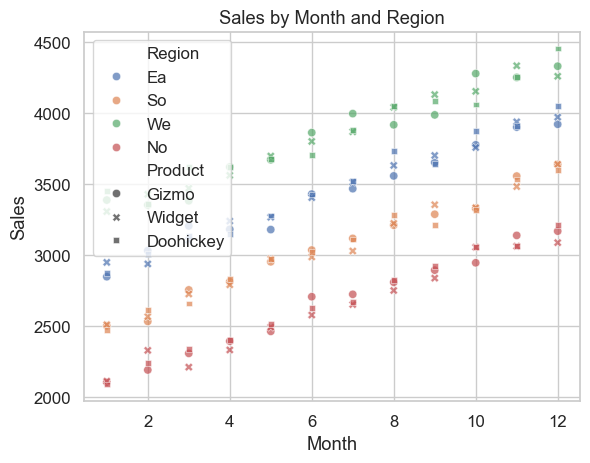

In [17]:
# TODO: tidy the data, visualize, and answer questions
df_tidy = df.melt(id_vars='Product', var_name='Region_Month', value_name='Sales')
df_tidy = df_tidy.assign(
    Region=df_tidy['Region_Month'].str[:2],
    Month=df_tidy['Region_Month'].str[3:].astype(int)
)
df_tidy = df_tidy.drop(columns='Region_Month')
print(df_tidy)
sns.scatterplot(data=df_tidy, x='Month', y='Sales', hue='Region', style='Product', alpha=0.7)
plt.title('Sales by Month and Region')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

- **Context** – The company wants to know for which region and month does the Gizmo sell the most, and if the other gadgets follow a similar trend.
- **Tidying steps** – Tidied up data by turning it into long form.
- **Findings** – The visuals suggest that Gizmo sells the best during December and in the West region. Additionally, other gadgets follow a similar trend of selling more later in the year.
- **Recommendations** – The company can expect to sell more of all gadgets during winter and in the West region.

### Challenge 2: IoT greenhouse sensor logs

*Stakeholder*: **Facility engineer**  
> “Our sensors embed temperature and humidity in one field. I suspect humidity spikes at night – can you confirm?”

**Key questions**
1. At what hours does humidity exceed 60 % most frequently?
2. Is there any correlation between temperature and humidity?

In [18]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():

    times = pd.date_range('2025-01-01', periods=48, freq='H')
    sensors = [f"S{i}" for i in range(1,6)]
    rows = []
    for t in times:
        row = {'timestamp': t}
        for s in sensors:
            temp = np.random.normal(20,3)
            hum = np.random.uniform(30,70)
            row[s] = f"{temp:.1f}|{hum:.0f}"
        rows.append(row)
    return pd.DataFrame(rows)


df = _simulate()
print("Shape:", df.shape)
df.head()

Shape: (48, 6)


C:\Users\dasha\AppData\Local\Temp\ipykernel_27824\3125190993.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  times = pd.date_range('2025-01-01', periods=48, freq='H')


,timestamp,S1,S2,S3,S4,S5
0,2025-01-01 00:00:00,23.4|43,23.2|60,16.1|36,22.0|62,19.8|54
1,2025-01-01 01:00:00,21.7|64,21.9|53,19.8|63,21.2|46,16.8|33
2,2025-01-01 02:00:00,15.3|64,18.5|31,19.6|44,21.1|31,18.8|67
3,2025-01-01 03:00:00,16.3|34,14.1|39,18.4|55,17.8|40,19.6|39
4,2025-01-01 04:00:00,18.3|30,18.8|35,20.9|70,20.2|46,21.3|50


#### Your analysis below

              timestamp section  temperature  humidity
0   2025-01-01 00:00:00      S1         23.4        43
1   2025-01-01 01:00:00      S1         21.7        64
2   2025-01-01 02:00:00      S1         15.3        64
3   2025-01-01 03:00:00      S1         16.3        34
4   2025-01-01 04:00:00      S1         18.3        30
..                  ...     ...          ...       ...
235 2025-01-02 19:00:00      S5         15.0        67
236 2025-01-02 20:00:00      S5         18.0        65
237 2025-01-02 21:00:00      S5         20.0        46
238 2025-01-02 22:00:00      S5         14.1        44
239 2025-01-02 23:00:00      S5         22.7        59

[240 rows x 4 columns]


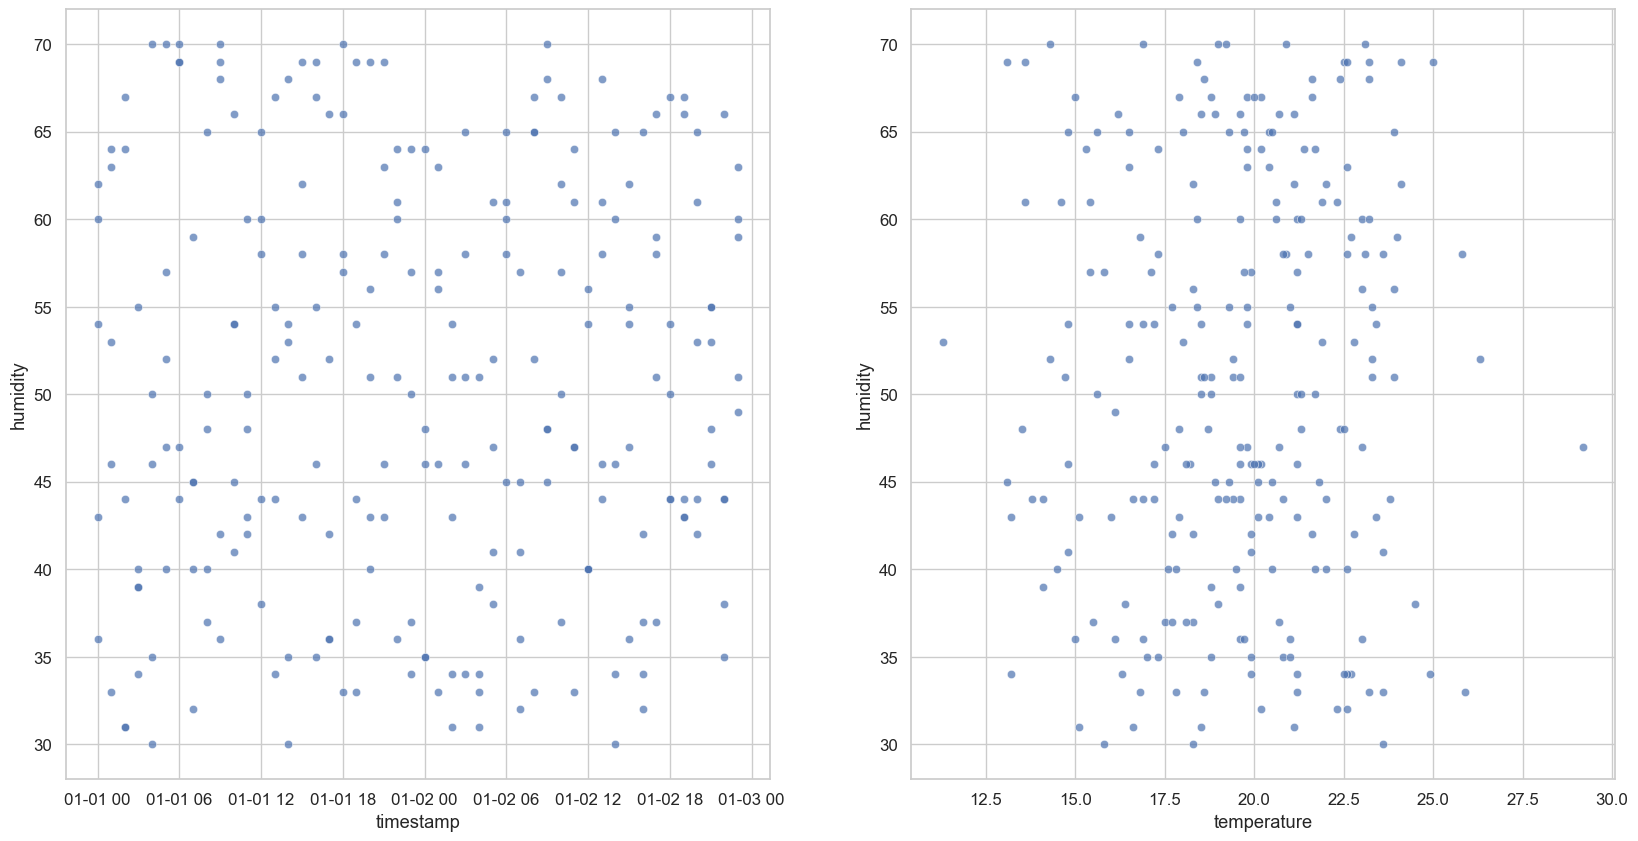

In [27]:
# TODO: tidy the data, visualize, and answer questions
df_tidy = df.melt(id_vars = "timestamp", var_name = "section", value_name = "temperature_humidity")
df_tidy = df_tidy.assign(
    temperature=df_tidy['temperature_humidity'].str[:4].astype(float),
    humidity=df_tidy['temperature_humidity'].str[5:].astype(int)
)
df_tidy = df_tidy.drop(columns = "temperature_humidity")
print(df_tidy)


figure, axes = plt.subplots(1, 2, figsize=(20,10))
sns.scatterplot(ax = axes[0], data=df_tidy, x='timestamp', y='humidity', alpha=0.7)
sns.scatterplot(ax = axes[1], data=df_tidy, x='temperature', y='humidity', alpha=0.7)
plt.show()

- **Context** – The engineer wants to know when the humidity is high and if it is related to temperature in any way.
- **Tidying steps** – Tidied up data by turning it into long form. Split temperature and humidity into their own columns.
- **Findings** – The visuals suggest that temperature and time of day have no correlation. Similarly, there is no correlation between temperature and humidity.
- **Recommendations** – The engineer can conclude that there is no need to be concerned about a humidityh rise during the nighttime.

### Challenge 3: Developer tools preference survey

*Stakeholder*: **Product manager**  
> “We surveyed devs about their favorite tools. Can you tell if age group influences tool choice and satisfaction?”

**Key questions**
1. Which tools are most popular in the 18-24 vs 45+ brackets?
2. Does reported satisfaction differ by primary tool?

In [42]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():

    n = 200
    choices = ['Python', 'R', 'MATLAB', 'JavaScript']
    data = {
        'respondent_id': range(1,n+1),
        'age_group': np.random.choice(['18-24','25-34','35-44','45+'], n),
        'tools_used': [', '.join(np.random.choice(choices, size=np.random.randint(1,4), replace=False)) for _ in range(n)],
        'satisfaction_1-5': np.random.randint(1,6, n)
    }
    return pd.DataFrame(data)


df = _simulate()
print("Shape:", df.shape)
df.head()

Shape: (200, 4)


,respondent_id,age_group,tools_used,satisfaction_1-5
0,1,25-34,Python,1
1,2,25-34,"JavaScript, R, Python",2
2,3,45+,JavaScript,2
3,4,35-44,"Python, R, MATLAB",1
4,5,35-44,"R, MATLAB, JavaScript",1


#### Your analysis below

     respondent_id age_group  tools_used  satisfaction_1-5
0                1     25-34      Python                 1
1                2     25-34  JavaScript                 2
2                2     25-34           R                 2
3                2     25-34      Python                 2
4                3       45+  JavaScript                 2
..             ...       ...         ...               ...
377            199     25-34      Python                 3
378            199     25-34      MATLAB                 3
379            199     25-34  JavaScript                 3
380            200     35-44           R                 1
381            200     35-44  JavaScript                 1

[382 rows x 4 columns]
     respondent_id age_group  tools_used  satisfaction_1-5
4                3       45+  JavaScript                 2
11               6     18-24      Python                 1
12               6     18-24      MATLAB                 1
24              12     18-24    

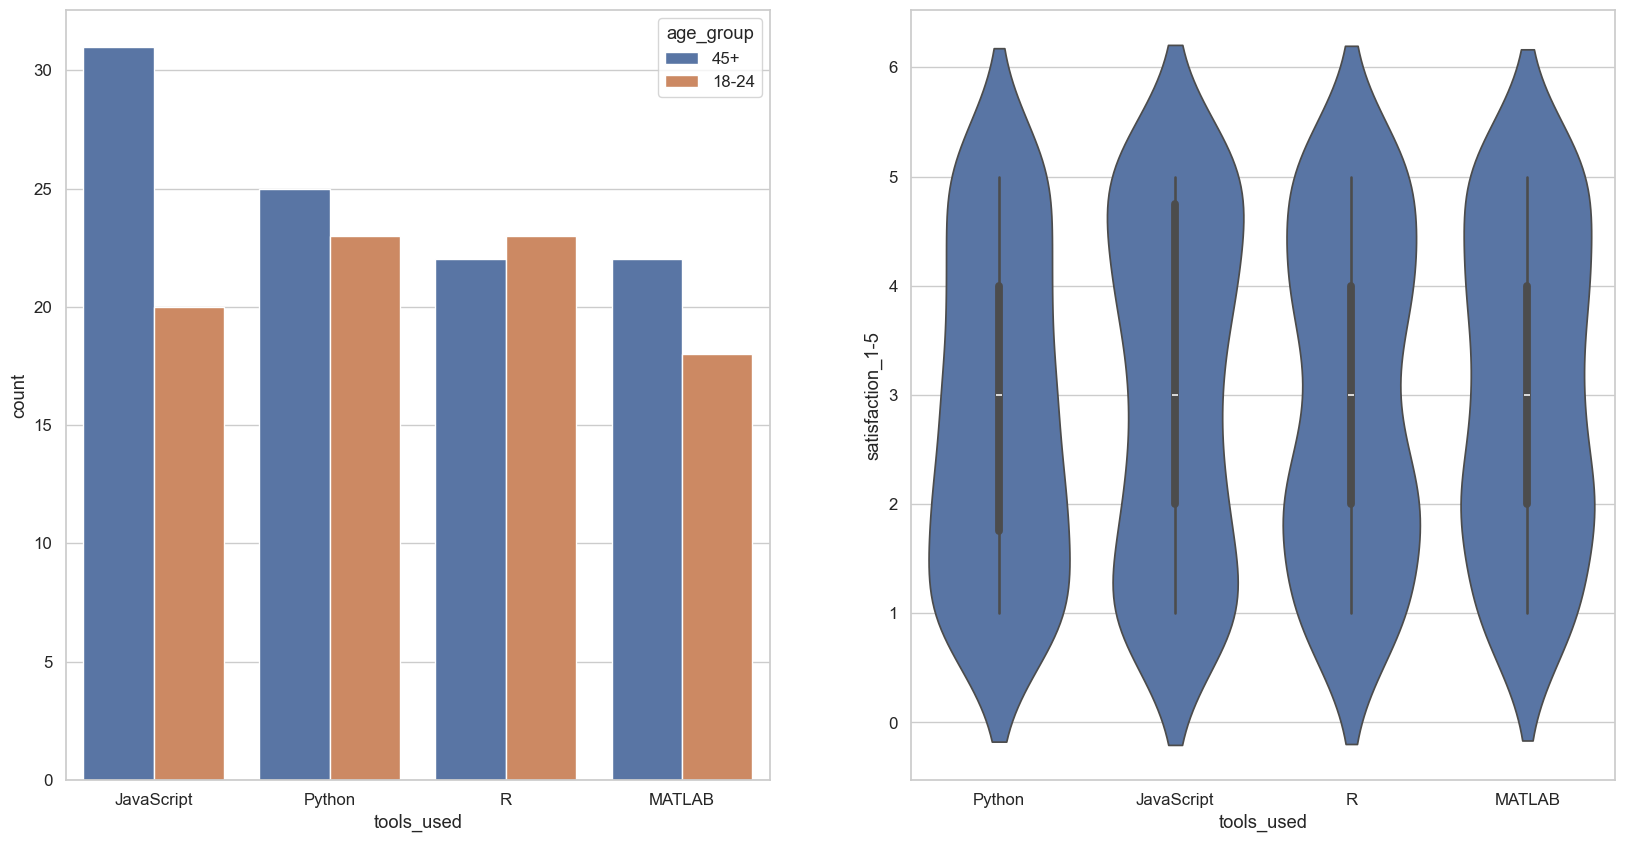

In [ ]:
# TODO: tidy the data, visualize, and answer questions
df_tidy = df.copy()
df_tidy["tools_used"] = df_tidy["tools_used"].str.split(", ")
df_tidy = df_tidy.explode("tools_used", ignore_index = True)
print(df_tidy)

filtered_data = df_tidy[df_tidy['age_group'].isin(['18-24', '45+'])]
print(filtered_data)
figure, axes = plt.subplots(1, 2, figsize=(20,10))
sns.countplot(ax = axes[0], data=filtered_data, x='tools_used', hue='age_group', order=filtered_data['tools_used'].value_counts().index)
sns.violinplot(ax = axes[1], data=df_tidy, x='tools_used', y='satisfaction_1-5')
plt.show()


- **Context** – The manager wants to understand the difference between preferred tools between a younger age group and older age group. THe manager also wants to know if different tools have different satisfaction levels.
- **Tidying steps** – Tidied up data by turning it into long form. Exploded each list of tools.
- **Findings** – Looking at the count plot of tools used by age group, the 18-24 age group is more interested in R and MATLAB. On the other hand, while the 45+ age group is also most interested in R, they demonstrate more interest in JavaScript. When comparing each tool, MATLAB and JavaScript tend to see higher average satisfaction levels.
- **Recommendations** – The manager, if interested in marketing these tools, should consider whether the tool is better marketed towards younger developers or older developers.
## NOTE: due to random seeding the results have changed and the conclusion would have to change as well.

### Challenge 4: Blood pressure drug trial

*Stakeholder*: **Principal Investigator**  
> “We ran a cross-over trial with three conditions. Summarise efficacy in reducing BP and highlight best performer.”

**Key questions**
1. What is the average BP reduction (post-minus-pre) for each drug?
2. Is there significant individual variability?

In [48]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():

    subjects = [f"Subj_{i:03d}" for i in range(1,51)]
    conditions = ['placebo','drugA','drugB']
    df = pd.DataFrame({'subject': subjects})
    for c in conditions:
        df[f"bp_pre_{c}"] = np.random.normal(120,10, len(subjects))
        df[f"bp_post_{c}"] = df[f"bp_pre_{c}"] - np.random.normal(5,2, len(subjects)) + (0 if c=='placebo' else  -10 + 5*conditions.index(c))
    return df


df = _simulate()
print("Shape:", df.shape)
df.head()

Shape: (50, 7)


,subject,bp_pre_placebo,bp_post_placebo,bp_pre_drugA,bp_post_drugA,bp_pre_drugB,bp_post_drugB
0,Subj_001,117.955292,113.467923,121.957716,109.715694,118.515156,113.626765
1,Subj_002,112.143974,108.388039,128.707952,120.737434,124.172756,118.776532
2,Subj_003,112.333756,110.758776,115.192106,102.749464,133.582702,128.550262
3,Subj_004,131.630419,126.317882,130.351350,118.961478,117.029083,111.047495
4,Subj_005,110.316039,105.806301,113.532026,106.137786,129.110626,123.757819


#### Your analysis below

      subject     drug  blood_pressure_reduction
0    Subj_001  placebo                 -4.487368
1    Subj_002  placebo                 -3.755935
2    Subj_003  placebo                 -1.574980
3    Subj_004  placebo                 -5.312537
4    Subj_005  placebo                 -4.509737
..        ...      ...                       ...
145  Subj_046    drugB                 -3.836431
146  Subj_047    drugB                 -5.162490
147  Subj_048    drugB                 -4.096475
148  Subj_049    drugB                 -6.222646
149  Subj_050    drugB                 -6.077595

[150 rows x 3 columns]


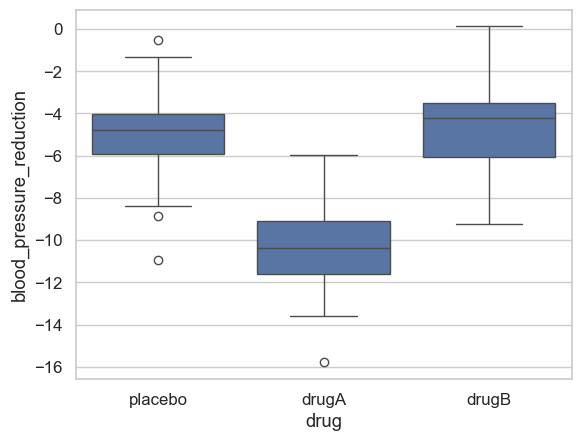

In [52]:
# TODO: tidy the data, visualize, and answer questions
df_tidy = df.copy()
df_tidy["placebo"] = df["bp_post_placebo"].astype(float) - df["bp_pre_placebo"].astype(float)
df_tidy["drugA"] = df["bp_post_drugA"].astype(float) - df["bp_pre_drugA"].astype(float)
df_tidy["drugB"] = df["bp_post_drugB"].astype(float) - df["bp_pre_drugB"].astype(float)
df_tidy = df_tidy.drop(columns = ["bp_pre_placebo", "bp_post_placebo","bp_pre_drugA", "bp_post_drugA", "bp_pre_drugB", "bp_post_drugB"])
df_tidy = df_tidy.melt(id_vars = "subject", var_name = "drug", value_name = "blood_pressure_reduction")
print(df_tidy)

sns.boxplot(data=df_tidy, x='drug', y='blood_pressure_reduction')
plt.show()


- **Context** – The investigator wants to investigate two drugs to lower blood pressure. A placebo was used along with the drugs.
- **Tidying steps** – Tidied up data by turning it into long form. Changed columns to the difference in blood pressure.
- **Findings** – Looking at the boxplots, one can see that patients treated with drug A experienced the greatest drop in blood pressure. While there is no significant variability in any treatment, the placebo had some more variability shown by the fact that it has three outliers. 
- **Recommendations** – The investigator should conclude that drug A was the most effective in lowering a patient's blood pressure.

### Challenge 5: Social media campaign analytics

*Stakeholder*: **Marketing lead**  
> “Our views are recorded as strings like ‘1.2k’. Clean this up and evaluate platform performance.”

**Key questions**
1. Which platform achieved the highest median daily *views* and *like rate*?
2. Are weekends different from weekdays?

In [54]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():

    dates = pd.date_range('2024-07-01', '2024-12-31', freq='D')
    platforms = ['TikTok','Instagram','YouTube']
    rows = []
    for d in dates:
        for p in platforms:
            views = np.random.randint(1000, 100000)
            likes = int(views * np.random.uniform(0.05, 0.2))
            rows.append({'date': d, 'platform': p, 'views': f"{views/1000:.1f}k", 'likes': likes if np.random.rand()>0.05 else np.nan})
    df = pd.DataFrame(rows)
    dup = df.sample(200)
    df = pd.concat([df, dup], ignore_index=True).reset_index(drop=True)
    return df


df = _simulate()
print("Shape:", df.shape)
df.head()

Shape: (752, 4)


,date,platform,views,likes
0,2024-07-01,TikTok,54.6k,2855.0
1,2024-07-01,Instagram,8.1k,1083.0
2,2024-07-01,YouTube,62.2k,5857.0
3,2024-07-02,TikTok,53.1k,7294.0
4,2024-07-02,Instagram,51.4k,6448.0


#### Your analysis below

          date   platform    views    likes  like_rate
0   2024-07-01     TikTok  54600.0   2855.0   0.052289
1   2024-07-01  Instagram   8100.0   1083.0   0.133704
2   2024-07-01    YouTube  62200.0   5857.0   0.094164
3   2024-07-02     TikTok  53100.0   7294.0   0.137363
4   2024-07-02  Instagram  51400.0   6448.0   0.125447
..         ...        ...      ...      ...        ...
747 2024-09-01  Instagram  93500.0  13347.0   0.142749
748 2024-10-13    YouTube  75600.0  12462.0   0.164841
749 2024-08-07  Instagram  13400.0    794.0   0.059254
750 2024-07-17  Instagram  47100.0   7014.0   0.148917
751 2024-11-10    YouTube  25700.0   3110.0   0.121012

[752 rows x 5 columns]


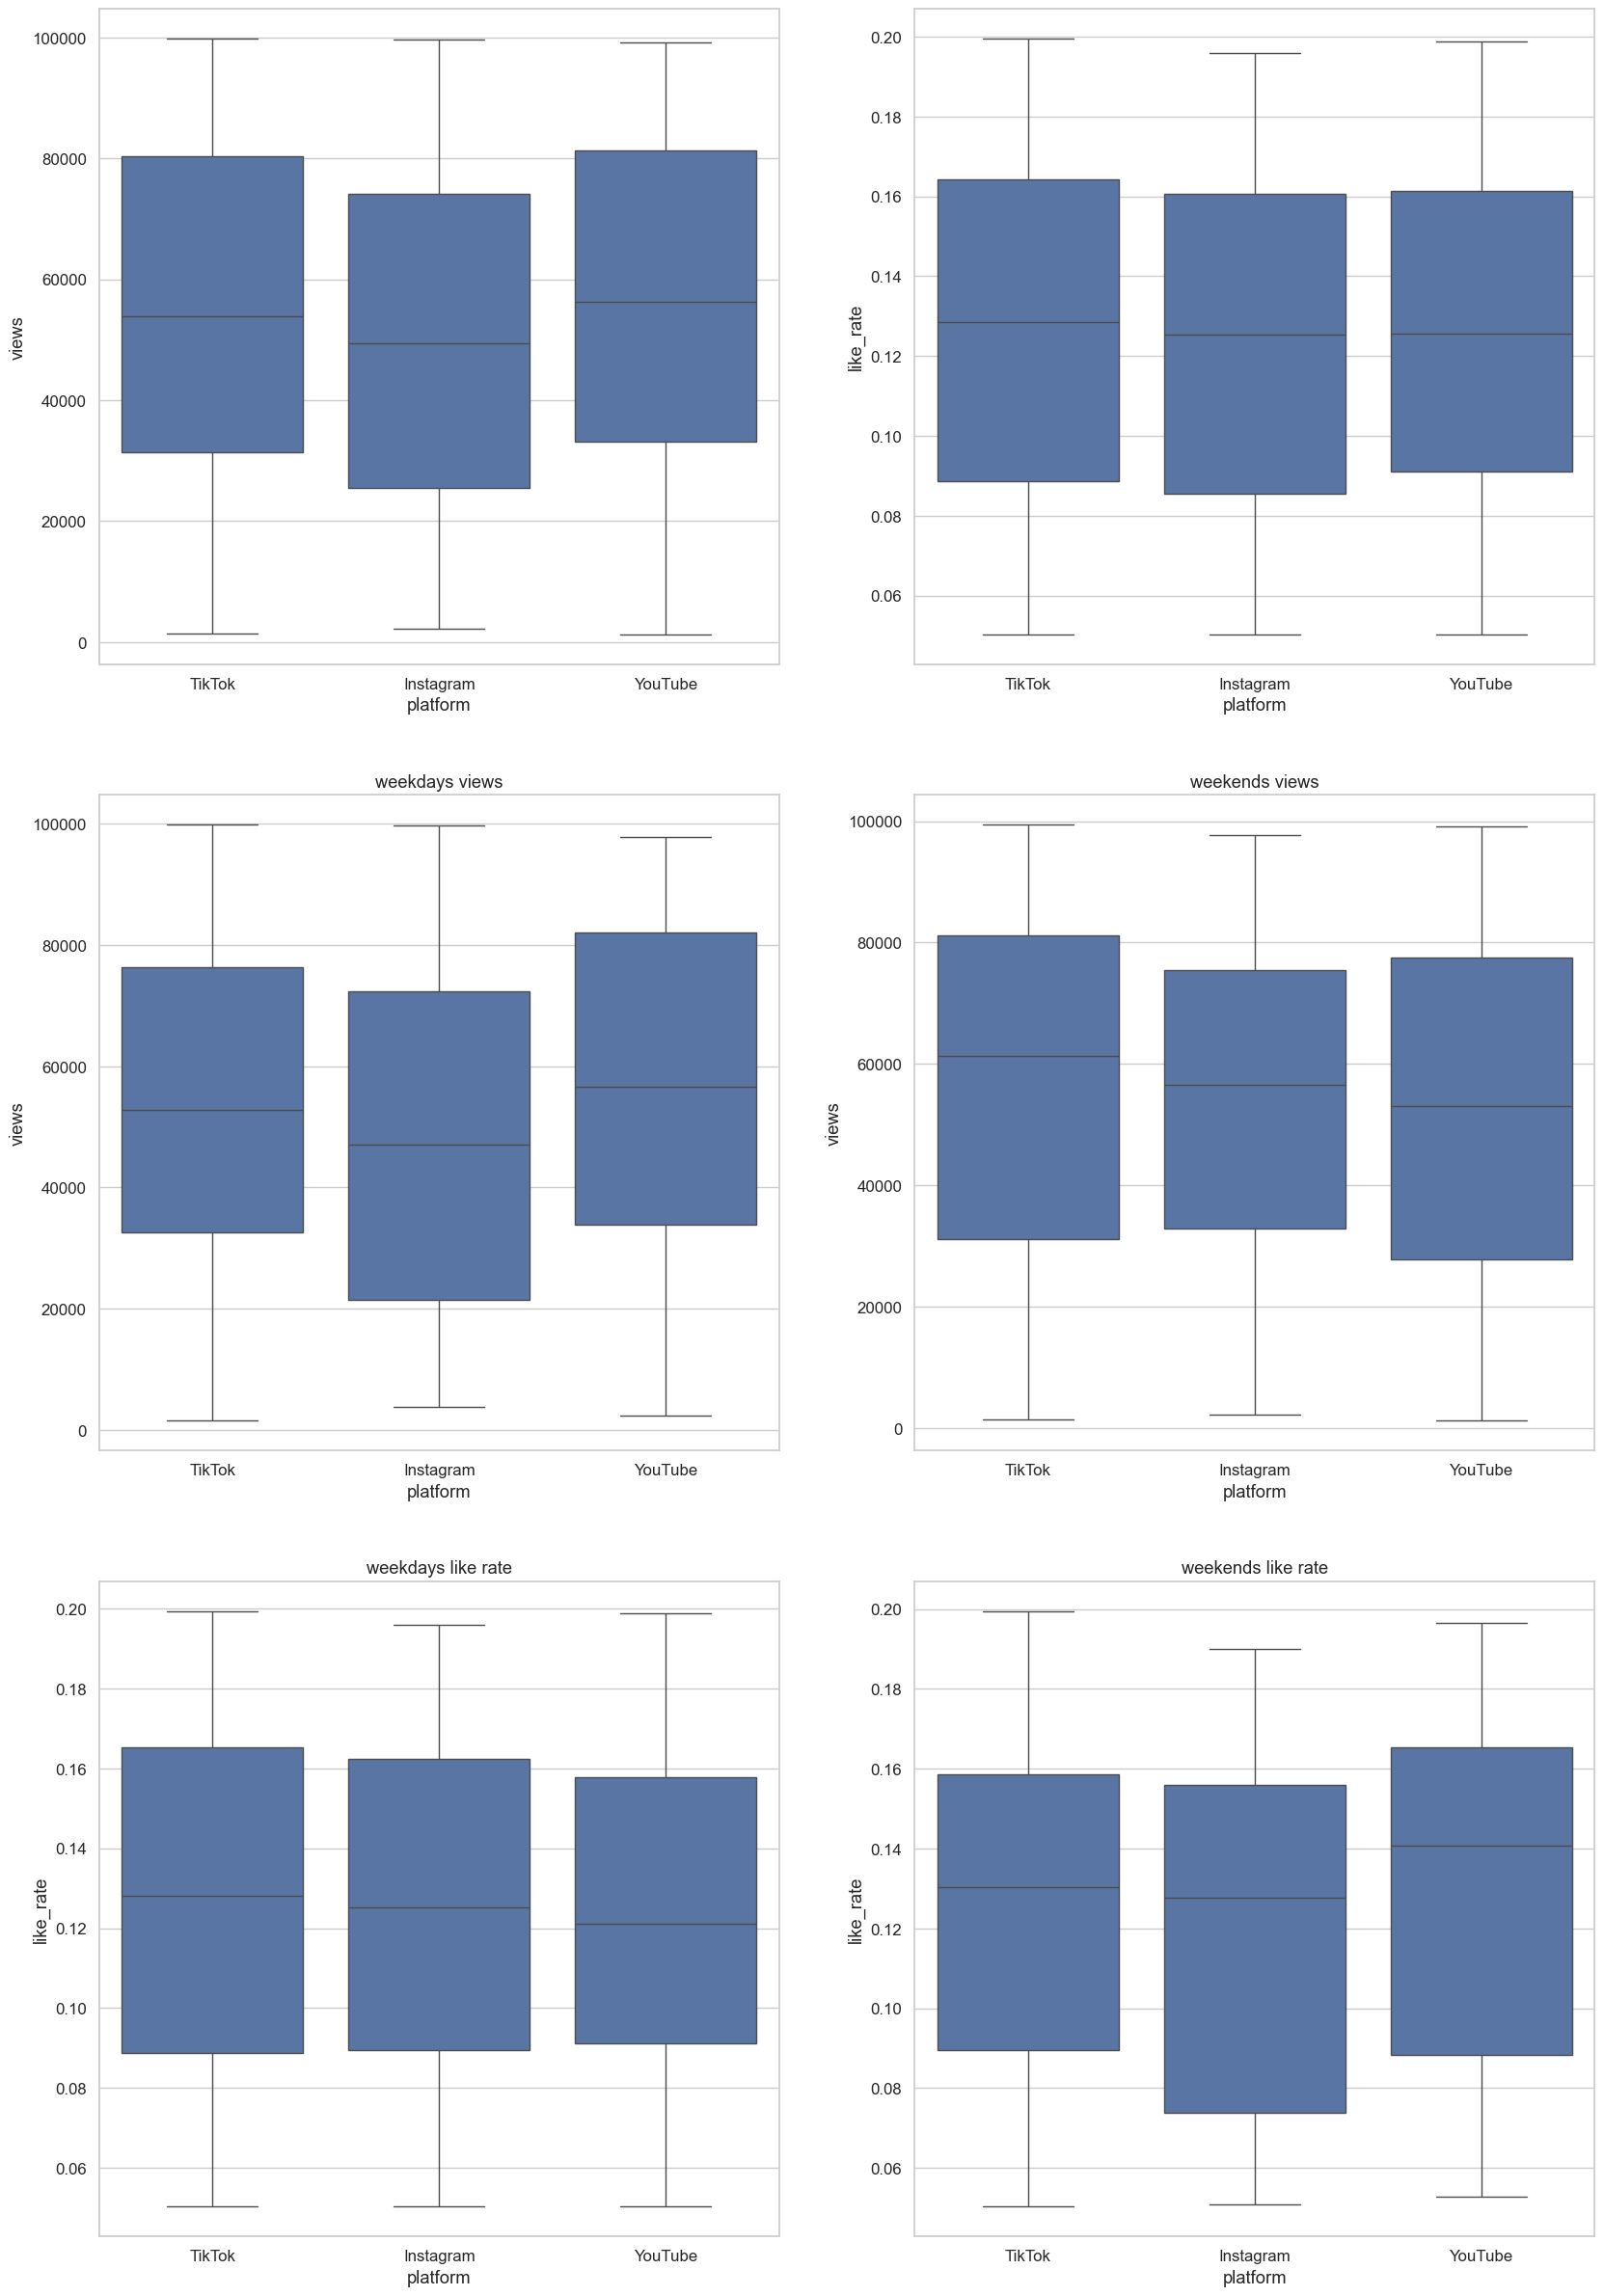

In [70]:
# TODO: tidy the data, visualize, and answer questions
df_tidy = df.copy()
df_tidy["views"] = df_tidy["views"].str.replace('k', "").astype(float) * 1000
df_tidy["like_rate"] = df_tidy["likes"].astype(float) / df_tidy["views"]
print(df_tidy)

filtered_weekdays = df_tidy[df_tidy['date'].dt.weekday < 5]
filtered_weekends = df_tidy[df_tidy['date'].dt.weekday >= 5]

figure, axes = plt.subplots(3, 2, figsize=(20,30))
sns.boxplot(ax = axes[0][0], data=df_tidy, x='platform', y = 'views')
sns.boxplot(ax = axes[0][1], data=df_tidy, x='platform', y = 'like_rate')
sns.boxplot(ax = axes[1][0], data=filtered_weekdays, x='platform', y = 'views')
axes[1][0].set_title("weekdays views")
sns.boxplot(ax = axes[1][1], data=filtered_weekends, x='platform', y = 'views')
axes[1][1].set_title("weekends views")
sns.boxplot(ax = axes[2][0], data=filtered_weekdays, x='platform', y = 'like_rate')
axes[2][0].set_title("weekdays like rate")
sns.boxplot(ax = axes[2][1], data=filtered_weekends, x='platform', y = 'like_rate')
axes[2][1].set_title("weekends like rate")
plt.show()


- **Context** – The marketer wants to know on which platforms their videos perform the best in terms of views and like rate. They also want to know if weekdays and weekends have a significant difference.
- **Tidying steps** – Tidied up data by turning it into long form. Filtered data by weekdays and weekends.
- **Findings** – It appears the Youtube videos get the most likes while Tiktok videos get the highest like rate. In addition, there seems to be no significant difference between performance on weekdays and weekends.
- **Recommendations** – The marketer should pursue their marketing on the platform that they consider to help them gain the most traction. They do not need to be concerned about the day of the week when they upload their video.